In [ ]:
import os
import pandas as pd
import numpy as np
import random
import tqdm
import math
from sklearn.cluster import KMeans
import gc
import matplotlib.pyplot as plt

In [ ]:
dfs = []

features = ['id', 'tell_call', 'total_time_remain', 'state', 'note_content', 'record_audio']

folder = '/home2/ivr-mappingcode/data/csv'
for fn in tqdm.tqdm(os.listdir(folder)):
    ffn = os.path.join(folder, fn)
    if features != 'all':
        dfs.append(pd.read_csv(ffn)[features])
    else:
        dfs.append(pd.read_csv(ffn))

df = pd.concat(dfs)

100%|██████████| 6/6 [02:36<00:00, 26.05s/it]


In [ ]:
del dfs
gc.collect()

0

In [ ]:
df

,id,tell_call,total_time_remain,state,note_content,record_audio
0,56291038,viettel,0,50,NO_USER_RESPONSE,https://feaicc.com/zone3/records/2022/07/27/Vb...
1,56291039,viettel,0,50,NO_USER_RESPONSE,https://feaicc.com/zone3/records/2022/07/27/Vb...
2,56291040,viettel,0,50,NO_USER_RESPONSE,https://feaicc.com/zone3/records/2022/07/27/Vb...
3,56291041,viettel,0,50,NO_USER_RESPONSE,https://feaicc.com/zone3/records/2022/07/27/Vb...
4,56291042,viettel,0,50,NO_USER_RESPONSE,https://feaicc.com/zone3/records/2022/07/27/Vb...
...,...,...,...,...,...,...
15024850,78868607,viettel,105,50,VOICEMAIL_DETECTION,https://feaicc.com/zone3/records/2022/10/31/Vb...
15024851,78868608,viettel,17,50,USER_BUSY,https://feaicc.com/zone3/records/2022/10/31/Vb...
15024852,78868609,viettel,28,40,NORMAL_CLEARING,https://feaicc.com/zone3/records/2022/10/31/Vb...
15024853,78868610,viettel,24,50,USER_BUSY,https://feaicc.com/zone3/records/2022/10/31/Vb...


In [ ]:
df.drop_duplicates('record_audio', inplace=True)
print(len(df))

25211865


In [ ]:
df.dropna(inplace=True)
print(len(df))

25211864


In [ ]:
df.drop('record_audio', axis=1, inplace=True)

In [ ]:
df

,id,tell_call,total_time_remain,state,note_content
0,56291038,viettel,0,50,NO_USER_RESPONSE
1,56291039,viettel,0,50,NO_USER_RESPONSE
2,56291040,viettel,0,50,NO_USER_RESPONSE
3,56291041,viettel,0,50,NO_USER_RESPONSE
4,56291042,viettel,0,50,NO_USER_RESPONSE
...,...,...,...,...,...
15024850,78868607,viettel,105,50,VOICEMAIL_DETECTION
15024851,78868608,viettel,17,50,USER_BUSY
15024852,78868609,viettel,28,40,NORMAL_CLEARING
15024853,78868610,viettel,24,50,USER_BUSY


In [ ]:
df = df[df['total_time_remain'] != 0].copy(deep=True)
gc.collect()
df

,id,tell_call,total_time_remain,state,note_content
7,56291045,viettel,61,40,NORMAL_CLEARING
23,56291061,viettel,35,50,NO_USER_RESPONSE
28,56291066,viettel,81,50,VOICEMAIL_DETECTION
30,56291068,viettel,53,50,NO_USER_RESPONSE
42,56291080,viettel,54,50,VOICEMAIL_DETECTION
...,...,...,...,...,...
15024850,78868607,viettel,105,50,VOICEMAIL_DETECTION
15024851,78868608,viettel,17,50,USER_BUSY
15024852,78868609,viettel,28,40,NORMAL_CLEARING
15024853,78868610,viettel,24,50,USER_BUSY


### K-Means for total_time_remain

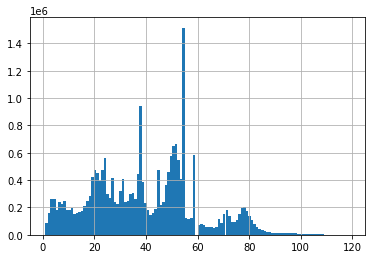

In [ ]:
df[df['total_time_remain'] < 120]['total_time_remain'].hist(bins=120)

100%|██████████| 10/10 [49:10<00:00, 295.08s/it]


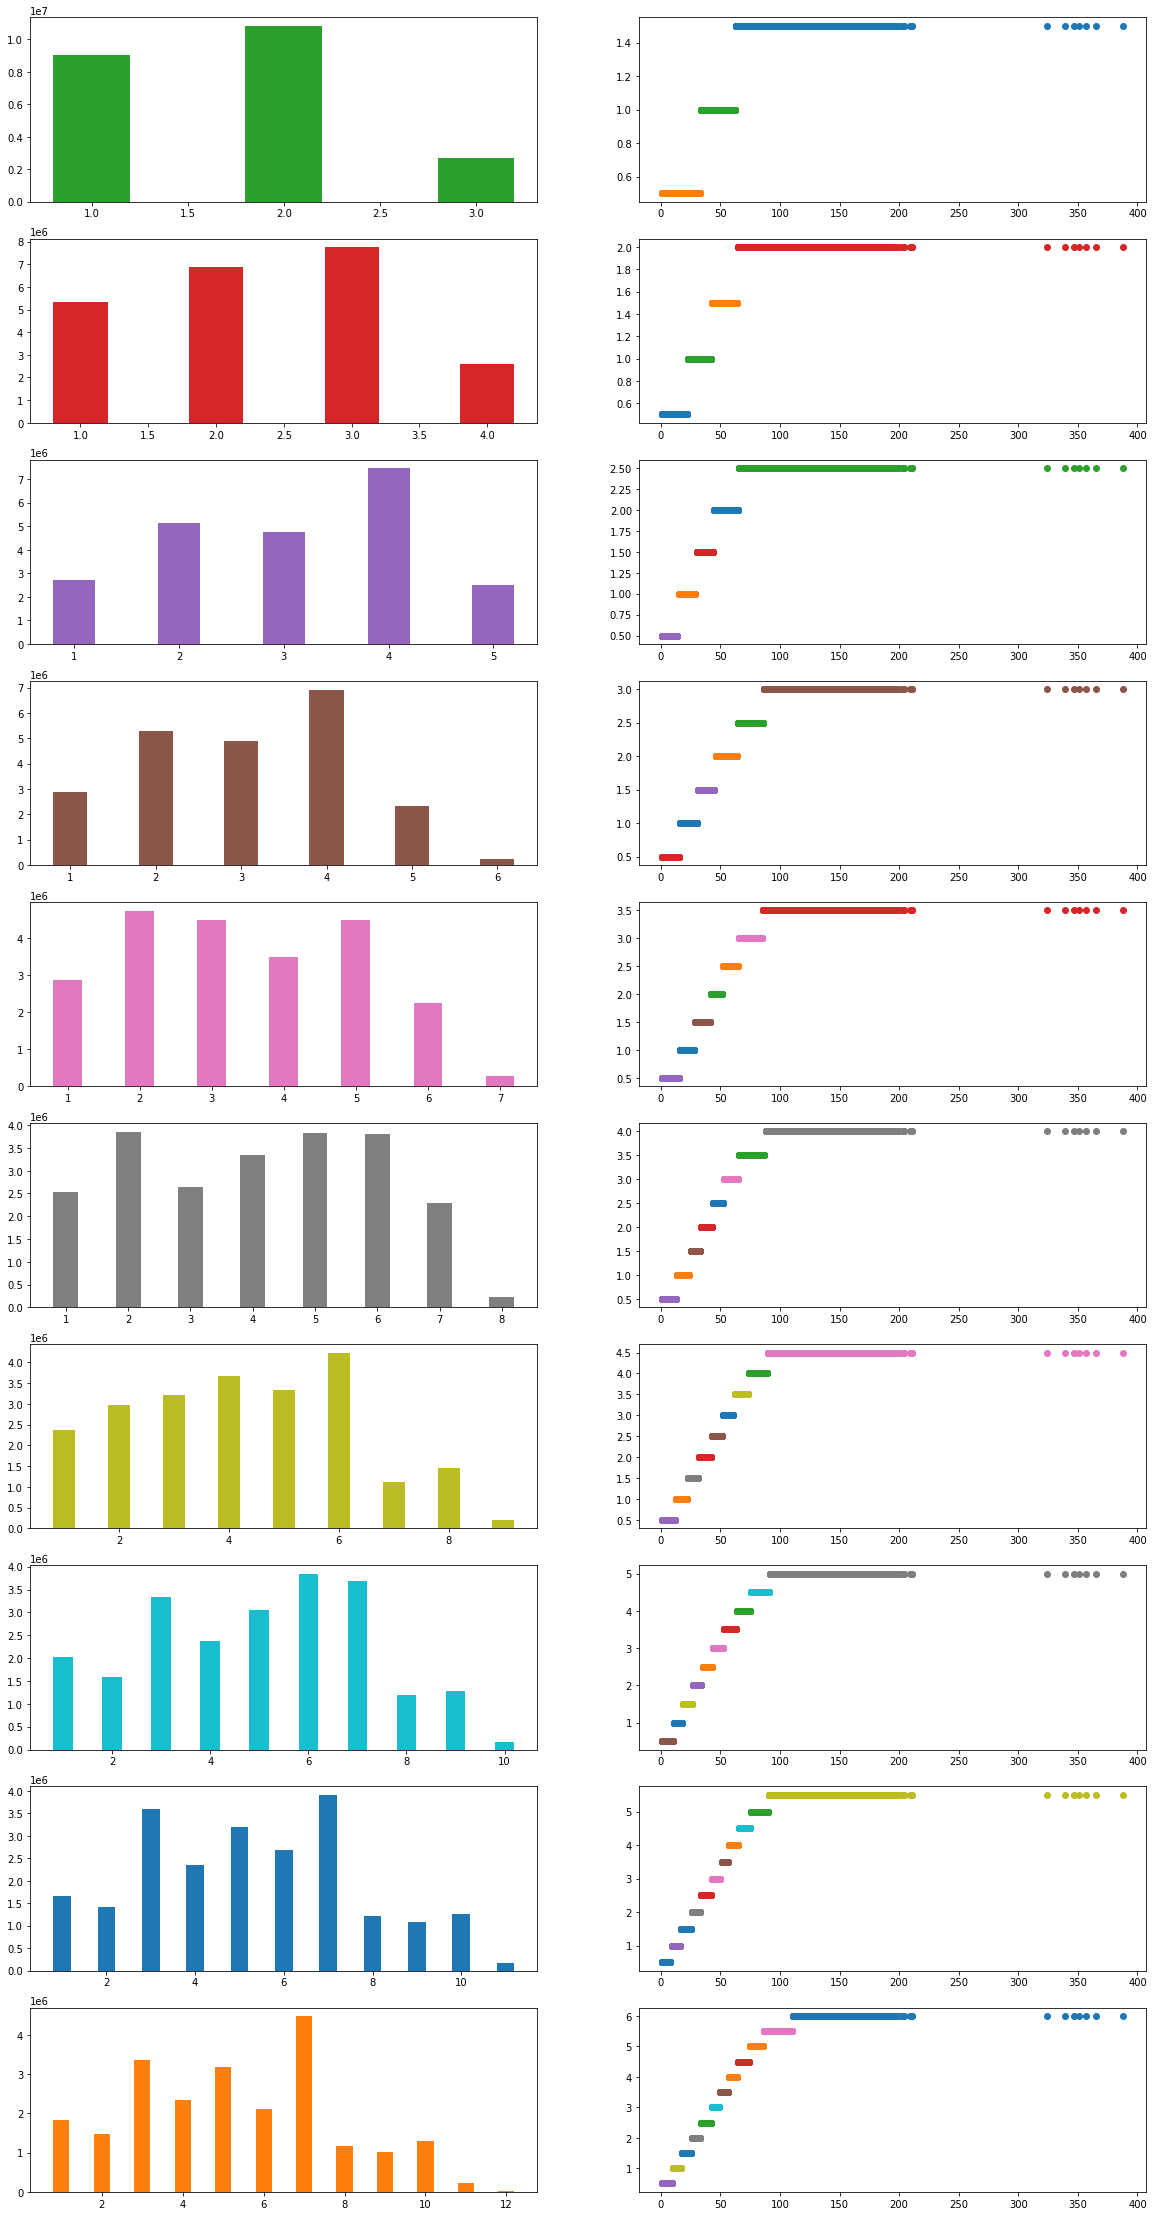

In [ ]:
# figure, axis = plt.subplots(10, 2, figsize=(20, 40))

# X = np.array(list(df['total_time_remain'])).reshape(-1,1)
# for i in tqdm.tqdm(range(3, 13)):
#     kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
#     pred = kmeans.predict(X)
#     df['label'] = pred
#     u_labels = np.unique(pred)

#     dct = {} 
#     for lb in u_labels:
#         dct[lb] = min(list(df[df['label'] == lb]['total_time_remain']))
    
#     sort_key = sorted(dct, key = lambda x : dct[x])

#     for i_ in range(len(sort_key)):
#         dct[sort_key[i_]] = i_ + 1 

#     df['label_bar'] = df['label'].apply(lambda x : dct[x])
#     dct_bar_count = dict(df['label_bar'].value_counts())
#     keys_bar, values_bar = [], []
#     for i_ in range(len(sort_key)):
#         keys_bar.append(i_ + 1)
#         values_bar.append(dct_bar_count[i_ + 1])

#     num_axis = i - 3
#     for lb in u_labels:
#         axis[num_axis, 0].bar(keys_bar, values_bar, width=0.4)
#         # axis[num_axis, 0].title(f'{i} cluster')
#         axis[num_axis, 1].scatter(df[df['label'] == lb]['total_time_remain'], [0.5*dct[lb]] * len(list(df[df['label'] == lb]['total_time_remain'])), label=lb)
#         # axis[num_axis, 1].title(f'{i} cluster')

In [ ]:
# df.head()

,id,tell_call,total_time_remain,state,note_content,label,label_bar
7,56291045,viettel,61,40,NORMAL_CLEARING,1,8
23,56291061,viettel,35,50,NO_USER_RESPONSE,2,5
28,56291066,viettel,81,50,VOICEMAIL_DETECTION,11,10
30,56291068,viettel,53,50,NO_USER_RESPONSE,5,7
42,56291080,viettel,54,50,VOICEMAIL_DETECTION,5,7


In [ ]:
# del X
# del u_labels
# del dct
# del dct_bar_count
# del kmeans
# del keys_bar
# del values_bar
# del axis
# del figure
# gc.collect()

In [ ]:
# assert False

In [ ]:
X = np.array(list(df['total_time_remain'])).reshape(-1,1)
kmeans = KMeans(n_clusters=9, random_state=42).fit(X)
pred = kmeans.predict(X)

In [ ]:
df['total_time_remain_label'] = pred

In [ ]:
df

,id,tell_call,total_time_remain,state,note_content,total_time_remain_label
7,56291045,viettel,61,40,NORMAL_CLEARING,0
23,56291061,viettel,35,50,NO_USER_RESPONSE,3
28,56291066,viettel,81,50,VOICEMAIL_DETECTION,2
30,56291068,viettel,53,50,NO_USER_RESPONSE,0
42,56291080,viettel,54,50,VOICEMAIL_DETECTION,0
...,...,...,...,...,...,...
15024850,78868607,viettel,105,50,VOICEMAIL_DETECTION,6
15024851,78868608,viettel,17,50,USER_BUSY,1
15024852,78868609,viettel,28,40,NORMAL_CLEARING,7
15024853,78868610,viettel,24,50,USER_BUSY,7


In [ ]:
del pred
del kmeans
del X
gc.collect()

0

### Stratify data

In [ ]:
dict_reality = dict(df['note_content'].value_counts())
# dict_reality = {key : dict_reality[key] for key in dict_reality if dict_reality[key] > 300}
order_keys = sorted(list(dict_reality.keys()), key=lambda x : dict_reality[x], reverse=True)
order_keys = [key for key in order_keys if dict_reality[key] > 300]

In [ ]:
print(len(df))
df = df.apply(lambda row: row[df['note_content'].isin(order_keys)])
print(len(df))

22554923
22554463


In [ ]:
values_real = [dict_reality[key] for key in order_keys]

<BarContainer object of 25 artists>

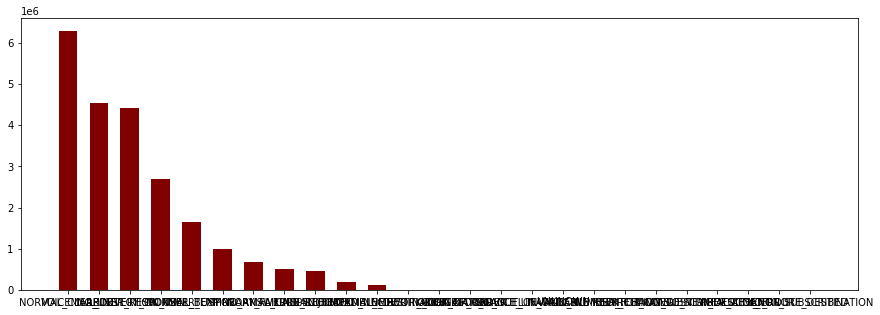

In [ ]:
fig = plt.figure(figsize = (15, 5))

plt.bar(order_keys, values_real, color ='maroon', width = 0.6)

In [ ]:
df['note_content'].value_counts()

NORMAL_CLEARING                   6288751
VOICEMAIL_DETECTION               4532524
NO_USER_RESPONSE                  4430255
RECOVERY_ON_TIMER_EXPIRE          2685525
USER_BUSY                         1642401
NORMAL_TEMPORARY_FAILURE           993207
NO_ANSWER                          674349
NORMAL_UNSPECIFIED                 501609
CALL_REJECTED                      468369
UNALLOCATED_NUMBER                 179748
INCOMPATIBLE_DESTINATION           121592
NORMAL_CIRCUIT_CONGESTION            7724
NETWORK_OUT_OF_ORDER                 7591
ORIGINATOR_CANCEL                    3788
DESTINATION_OUT_OF_ORDER             3513
SERVICE_UNAVAILABLE                  2297
UNKNOWN                              2174
INVALID_NUMBER_FORMAT                1660
NUMBER_CHANGED                       1653
SWITCH_CONGESTION                    1492
REDIRECTION_TO_NEW_DESTINATION       1491
SUBSCRIBER_ABSENT                    1070
PROTOCOL_ERROR                        592
FACILITY_NOT_SUBSCRIBED           

In [ ]:
ratios = []
for i in range(len(order_keys) - 1):
  ratios.append(dict_reality[order_keys[i]] / dict_reality[order_keys[i+1]])

In [ ]:
print(len(order_keys))

25


In [ ]:
for i in range(len(order_keys)):
  print(dict_reality[order_keys[i]])

In [ ]:
ratios = ratios[::-1]
print(ratios)

[1.0260707635009312, 1.074410163339383, 1.8074324324324325, 1.3934579439252337, 1.000670690811536, 1.1079088471849865, 1.0042347247428918, 1.3096385542168674, 1.0565777368905245, 1.5293861558554636, 1.0782806717904925, 2.003959873284055, 1.0175207482545119, 15.742102537545314, 1.478288045266136, 2.605697977168035, 1.0709696841592846, 1.344371811510559, 1.472838248444055, 1.653634136690539, 1.635121386311869, 1.6496792992059282, 1.0230842242715148, 1.3874721898880182]


540358 [71384, 64704, 64263, 55302, 47717, 41034, 36534, 33430, 32749, 28554, 28554, 7724, 7591, 3788, 3513, 2297, 2174, 1660, 1653, 1492, 1491, 1070, 592, 551, 537] 25


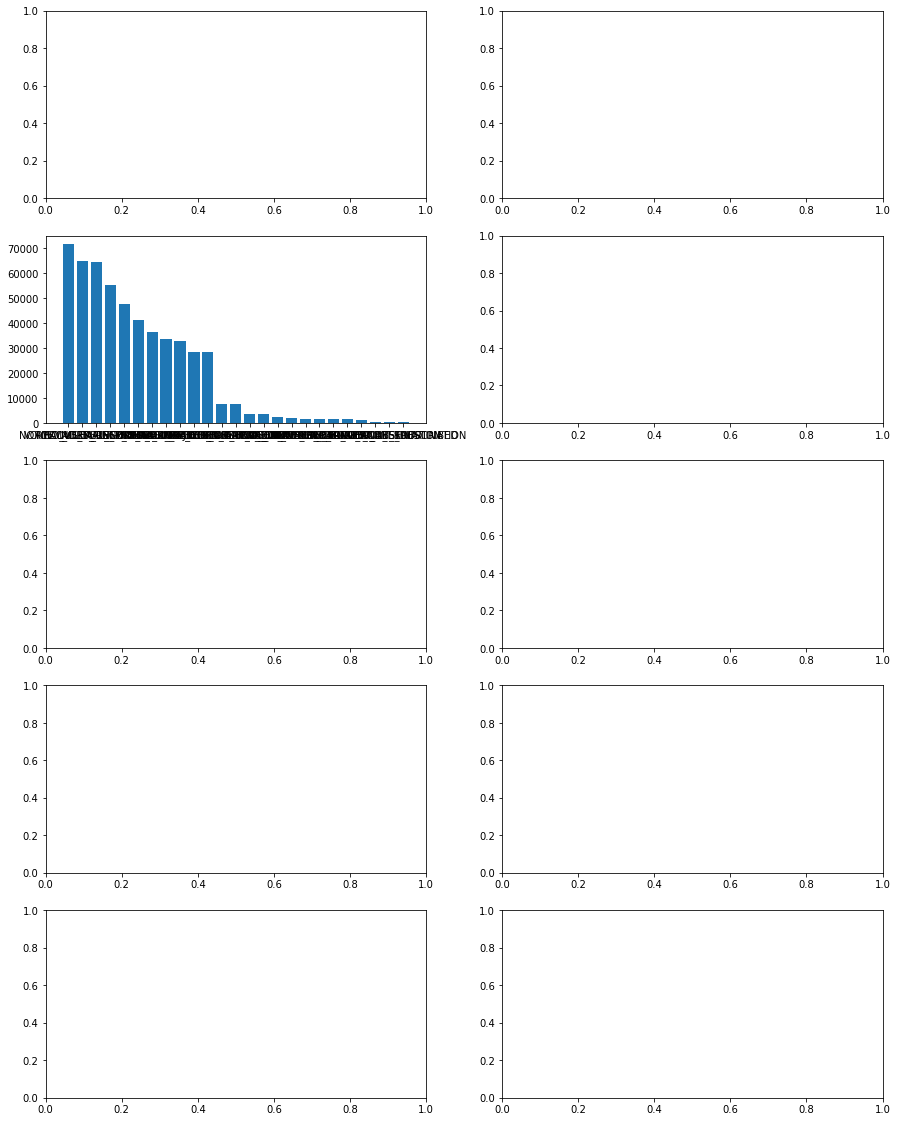

In [ ]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(5, 2, figsize = (15, 20))

total_file = 500000

for i in range(3, 4):
    p = i * 0.1
    new_ratios = np.power(ratios, p)
    # sum_ratio = 1 + np.sum(1 / new_ratios)
    smallest_note_content = min(values_real)
    new_values_samp = [smallest_note_content]
    
    for j in range(len(new_ratios)):
        times = 1 if j != 0 else 8
        # times = 1
        new_number = round(new_values_samp[-1] * new_ratios[j]) * times
        new_values_samp.append(new_number)

    new_values_samp = new_values_samp[::-1]

    for j in range(len(new_values_samp)):
        # new_values_samp[j] = min(new_values_samp[j], dict_reality[order_keys[j]])
        if new_values_samp[j] > round(max(new_values_samp) * 0.4):
            new_values_samp[j] = min(new_values_samp[j], dict_reality[order_keys[j]])
        else:
            new_values_samp[j] = min(round(max(new_values_samp) * 0.4), dict_reality[order_keys[j]])
    print(sum(new_values_samp), new_values_samp, len(new_values_samp))
    axis[(i - 1) // 2, (i - 1) % 2].bar(order_keys, new_values_samp)

In [ ]:
print(new_values_samp)

[71384, 64704, 64263, 55302, 47717, 41034, 36534, 33430, 32749, 28554, 28554, 7724, 7591, 3788, 3513, 2297, 2174, 1660, 1653, 1492, 1491, 1070, 592, 551, 537]


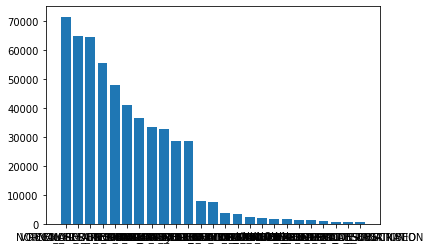

In [ ]:
plt.bar(order_keys, new_values_samp)
plt.show()

In [ ]:
# dct_note_content = {'NORMAL_CLEARING': 122251, 'NO_USER_RESPONSE': 113747, 'VOICEMAIL_DETECTION': 105320, 'RECOVERY_ON_TIMER_EXPIRE': 86078, 'NORMAL_TEMPORARY_FAILURE': 68037, 'USER_BUSY': 54533, 'NO_ANSWER': 35544, 'CALL_REJECTED': 25138, 'PROGRESS_TIMEOUT': 19129, 'NORMAL_UNSPECIFIED': 15626, 'INCOMPATIBLE_DESTINATION': 13265, 'NORMAL_CIRCUIT_CONGESTION': 11462, 'UNALLOCATED_NUMBER': 8024, 'EXCEPTION_CALL': 5415, 'DESTINATION_OUT_OF_ORDER': 5415, 'DATA_ENCRYPTED_INVALID': 5415, 'NETWORK_OUT_OF_ORDER': 5415, 'UNKNOWN': 4821, 'ORIGINATOR_CANCEL': 3788, 'SERVICE_UNAVAILABLE': 2301, 'REDIRECTION_TO_NEW_DESTINATION': 1977, 'INVALID_NUMBER_FORMAT': 1813, 'NUMBER_CHANGED': 1674, 'SWITCH_CONGESTION': 1492, 'SUBSCRIBER_ABSENT': 1175, 'NO_ROUTE_DESTINATION': 603, 'PROTOCOL_ERROR': 592, 'FACILITY_NOT_SUBSCRIBED': 551, 'SERVICE_NOT_IMPLEMENTED': 386, 'BEARERCAPABILITY_NOTAUTH': 313}

In [ ]:
dct_note_content = {order_keys[i] : new_values_samp[i] for i in range(len(order_keys))}
dct_note_content

{'NORMAL_CLEARING': 71384,
 'VOICEMAIL_DETECTION': 64704,
 'NO_USER_RESPONSE': 64263,
 'RECOVERY_ON_TIMER_EXPIRE': 55302,
 'USER_BUSY': 47717,
 'NORMAL_TEMPORARY_FAILURE': 41034,
 'NO_ANSWER': 36534,
 'NORMAL_UNSPECIFIED': 33430,
 'CALL_REJECTED': 32749,
 'UNALLOCATED_NUMBER': 28554,
 'INCOMPATIBLE_DESTINATION': 28554,
 'NORMAL_CIRCUIT_CONGESTION': 7724,
 'NETWORK_OUT_OF_ORDER': 7591,
 'ORIGINATOR_CANCEL': 3788,
 'DESTINATION_OUT_OF_ORDER': 3513,
 'SERVICE_UNAVAILABLE': 2297,
 'UNKNOWN': 2174,
 'INVALID_NUMBER_FORMAT': 1660,
 'NUMBER_CHANGED': 1653,
 'SWITCH_CONGESTION': 1492,
 'REDIRECTION_TO_NEW_DESTINATION': 1491,
 'SUBSCRIBER_ABSENT': 1070,
 'PROTOCOL_ERROR': 592,
 'FACILITY_NOT_SUBSCRIBED': 551,
 'NO_ROUTE_DESTINATION': 537}

In [ ]:
df['id'] = df['id'].apply(lambda x : str(x))

In [ ]:
# with open('/content/drive/MyDrive/IVR/save/priority_id.txt', 'r') as f: 
#     prio_ids = f.readlines()
#     prio_ids = [line.strip() for line in prio_ids]

In [ ]:
# prio_ids[:2]

['34497329', '33233420']

In [ ]:
prio_ids = []

In [ ]:
strata = ['state','total_time_remain_label', 'tell_call']

In [ ]:
ids = []
first = True
assert len(strata) > 0
for nc in tqdm.tqdm(dct_note_content):
    tmp_df = df[df['note_content'] == nc]
    count_df = tmp_df.groupby(strata).size().reset_index(name='count')
    sum_count = sum(list(count_df['count']))
    count_df['take'] = count_df['count'].apply(lambda x : min(x, math.ceil(dct_note_content[nc] / sum_count * x)))
    ids_note_content = []
    for i in range(len(count_df)):
        search_df = tmp_df
        for fea in strata:
            search_df = search_df[search_df[fea] == count_df.loc[i][fea]]
        number_take = count_df.loc[i]['take']
        ids_satisfied = list(search_df['id'])
        intersect = set(ids_satisfied).intersection(prio_ids)
        if first:
            print(intersect)
            first = False

        if len(intersect) >= number_take:
            ids_note_content.extend(random.sample(list(intersect), number_take))
        else:
            ids_note_content.extend(list(intersect))
            diff = set(ids_satisfied) - intersect
            ids_note_content.extend(random.sample(list(diff), number_take - len(intersect)))

        # ids_note_content.extend(random.sample(list(search_df['id']), number_take))
    ids.extend(random.sample(ids_note_content, dct_note_content[nc]))

  0%|          | 0/25 [00:00<?, ?it/s]

{'30254938', '31911097', '38527157', '37769106', '30570791', '78584689', '37987287', '38428310', '64558437', '74652479', '30529780', '68197203', '77951438', '68536001', '64470143', '69275866', '76905655', '78576866', '38204767', '33647531', '65792761', '33632828', '74603924', '70874243', '75335237', '36880313', '30237958', '32687407', '33405805', '28899770', '76042317', '77444526', '74659677', '78423868', '30561620', '67213840', '65991995', '30177061', '31829667', '66956642', '36901581', '31374786', '29233918', '69417543', '35818173', '36516307', '67312033', '73262249', '77896610', '36846118', '66407455', '35832026', '78031151', '65657336', '38584968', '34856772', '74724690', '67013665', '69444911', '35087660', '29562297', '34192421', '33271134', '64522084', '30657754', '77937188', '35662915', '71681467', '77627620', '29645694', '66984681', '77158038', '77489687', '67575216', '67848457', '38972576', '28902225', '78224017', '77671221', '64435796', '70946132', '29328146', '72113984', '29

100%|██████████| 25/25 [02:59<00:00,  7.19s/it]


In [ ]:
new_df = df.apply(lambda row: row[df['id'].isin(ids)])

In [ ]:
new_df

,id,tell_call,total_time_remain,state,note_content,total_time_remain_label
2910,56293948,vinaphone,29,50,NORMAL_UNSPECIFIED,7
2949,56293987,viettel,51,50,RECOVERY_ON_TIMER_EXPIRE,5
3451,56294489,viettel,37,50,CALL_REJECTED,3
3865,56294903,viettel,41,50,VOICEMAIL_DETECTION,3
4816,56295854,viettel,38,50,CALL_REJECTED,3
...,...,...,...,...,...,...
15024643,78868400,viettel,46,50,NO_USER_RESPONSE,5
15024665,78868422,mobiphone,61,40,NORMAL_CLEARING,0
15024730,78868487,viettel,59,50,NO_ANSWER,0
15024745,78868502,vinaphone,55,50,NO_USER_RESPONSE,0


In [ ]:
new_df['total_time_remain_label'].value_counts()

0    102392
4     88048
7     86273
3     79040
5     75220
1     70966
2     20415
8     15366
6      2638
Name: total_time_remain_label, dtype: int64

In [ ]:
dct = dict(new_df.note_content.value_counts())
for key in dct:
    print(key, dct[key], dct_note_content[key])

NORMAL_CLEARING 71384 71384
VOICEMAIL_DETECTION 64704 64704
NO_USER_RESPONSE 64263 64263
RECOVERY_ON_TIMER_EXPIRE 55302 55302
USER_BUSY 47717 47717
NORMAL_TEMPORARY_FAILURE 41034 41034
NO_ANSWER 36534 36534
NORMAL_UNSPECIFIED 33430 33430
CALL_REJECTED 32749 32749
UNALLOCATED_NUMBER 28554 28554
INCOMPATIBLE_DESTINATION 28554 28554
NORMAL_CIRCUIT_CONGESTION 7724 7724
NETWORK_OUT_OF_ORDER 7591 7591
ORIGINATOR_CANCEL 3788 3788
DESTINATION_OUT_OF_ORDER 3513 3513
SERVICE_UNAVAILABLE 2297 2297
UNKNOWN 2174 2174
INVALID_NUMBER_FORMAT 1660 1660
NUMBER_CHANGED 1653 1653
SWITCH_CONGESTION 1492 1492
REDIRECTION_TO_NEW_DESTINATION 1491 1491
SUBSCRIBER_ABSENT 1070 1070
PROTOCOL_ERROR 592 592
FACILITY_NOT_SUBSCRIBED 551 551
NO_ROUTE_DESTINATION 537 537


In [ ]:
save_file = '/home2/ivr-mappingcode/data/19122022_stratified_data.csv'

In [ ]:
new_df.to_csv(save_file, index=False)

In [ ]:
# search_df = tmp_df[tmp_df[strata[0]] == count_df.loc[i][strata[0]]]
        # if len(strata) > 0:
        #     for fea in strata[1:]:
        #         search_df = search_df[search_df[fea] == count_df.loc[i][fea]]